In [1]:
import numpy as np
from PIL import Image, ImageFilter, ImageChops
import matplotlib.pyplot as plt

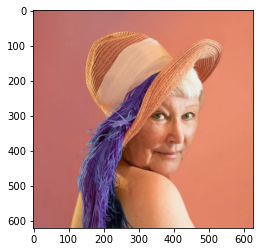

In [2]:
#1
with Image.open('OldLenna.png') as lenna_c:
    plt.imshow(lenna_c)

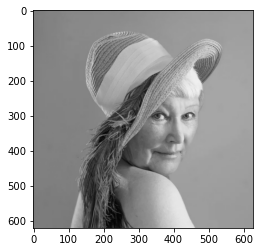

In [3]:
grayscale = lambda src : np.dot(src[... , :3], [0.299 , 0.587, 0.114])
with Image.fromarray(grayscale(np.asarray(lenna_c))) as lenna_gs:
    plt.imshow(lenna_gs)

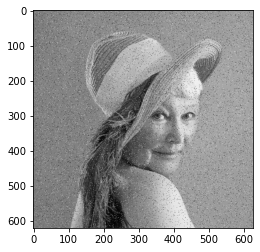

In [4]:
#2
def salt_and_pepper(img, amount, salt_vs_pepper):
    rng = np.random.default_rng()
    flipped = rng.random(img.size) <= amount 
    salted = rng.random(img.size) <= salt_vs_pepper 
    peppered = ~salted

    img_arr = np.copy(img)
    img_arr[np.transpose(flipped & salted)] = 255
    img_arr[np.transpose(flipped & peppered)] = 0    

    return Image.fromarray(img_arr)

with salt_and_pepper(lenna_gs, 0.05, 0.5) as lenna_sp:
    plt.imshow(lenna_sp)

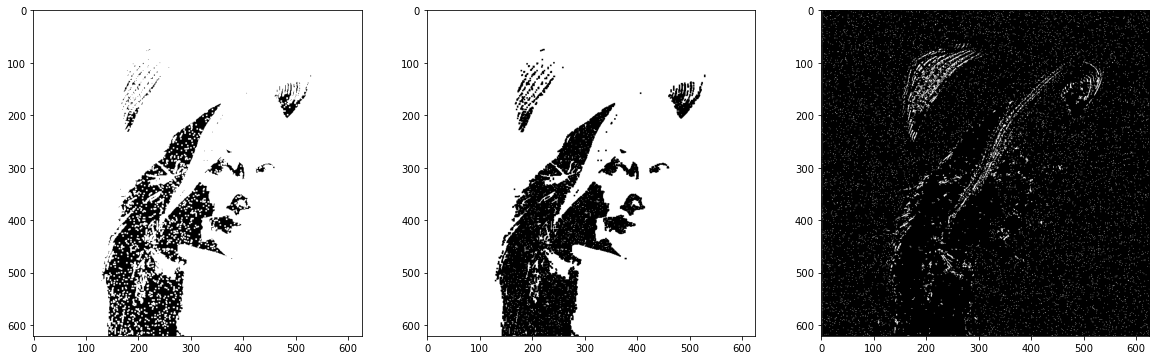

In [9]:
#3
def binary_image(img, threshold):
    img_arr = np.copy(img)
    img_arr[img_arr < threshold] = 0
    img_arr[img_arr >= threshold] = 255    
    return Image.fromarray(np.uint8(img_arr))        

with binary_image(lenna_sp, 120) as lenna_b, \
    lenna_b.filter(ImageFilter.MaxFilter()) as lenna_bd, \
        lenna_bd.filter(ImageFilter.MinFilter()) as lenna_bde, \
            ImageChops.difference(lenna_b, lenna_bde) as lenna_mask:
                plt.figure(figsize=(20,20))
                plt.subplot(1, 3, 1)
                plt.imshow(lenna_bd, cmap=plt.cm.gist_gray)
                plt.subplot(1, 3, 2)
                plt.imshow(lenna_bde, cmap=plt.cm.gist_gray)
                plt.subplot(1, 3, 3)
                plt.imshow(lenna_mask, cmap=plt.cm.gist_gray)

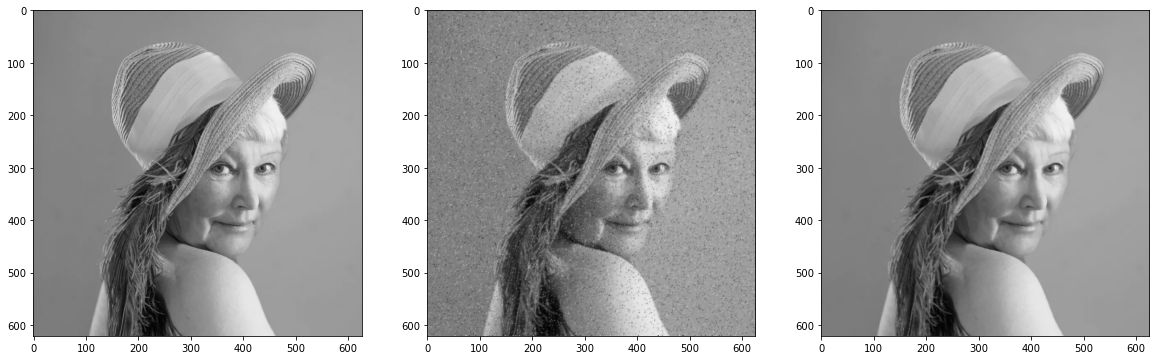

In [10]:
#4,5
with lenna_sp.copy() as lenna_sp_nm, \
    lenna_sp.filter(ImageFilter.MedianFilter) as lenna_sp_mf: 
        for i in range(1, lenna_mask.size[0] - 1):
            for j in range(1, lenna_mask.size[1] - 1):
                pixel = lenna_mask.getpixel((i, j))
                if pixel == 0 or pixel == 255:
                    neighbours = [lenna_sp_nm.getpixel(t) for t in [(i - 1, j), (i, j - 1), (i + 1, j), (i, j + 1)]] 
                    lenna_sp_nm.putpixel((i, j), np.mean(neighbours))
        plt.figure(figsize=(20,20))
        plt.subplot(1, 3, 1)
        plt.imshow(lenna_gs, cmap=plt.cm.gist_gray)
        plt.subplot(1, 3, 2)
        plt.imshow(lenna_sp_nm, cmap=plt.cm.gist_gray)
        plt.subplot(1, 3, 3)
        plt.imshow(lenna_sp_mf, cmap=plt.cm.gist_gray)

При визуальной оценке видно, что медианный фильтр Pillow обеспечивает лучшее качество.